# Heart Failure Prediction 

# Perform Exploratory Data Analysis(EDA)


Dataset could be download from: 

https://www.kaggle.com/fedesoriano/heart-failure-prediction


In [1]:
# Importing libraries

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(color_codes=True)
sns.set_style('whitegrid')
pd.set_option('display.width', 2000)
np.set_printoptions(linewidth=2000)
pd.set_option('display.max_columns', 25)


Reading the dataset and creating dataframe

In [2]:
data = pd.read_csv("heart.csv")
# Displaying top 5 rows of dataset

data.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# Displaying bottom 5 rows of dataset

data.tail(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [4]:
#Getting information about number of columns and datatypes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000



# Checking for null values

In [6]:
data.isnull().sum()


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There is no null values in any rows


# Checking any duplicate values

In [7]:
duplicate_data = data[data.duplicated()]
duplicate_data.shape


(0, 12)

There seems to be no duplicate values in the dataset. 

# Simple Graphical Visualization
# Count Plot

<AxesSubplot:xlabel='Sex', ylabel='count'>

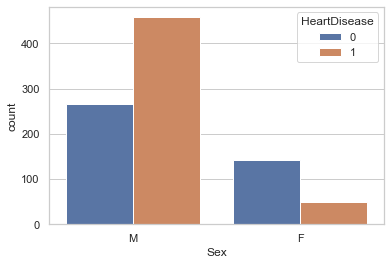

In [8]:
# Which gender has more number of heart disease?

sns.countplot(data=data, x='Sex', hue='HeartDisease')  # 0 - No , 1 - Yes



Inference - Male gender seems to have more number of heart disease comapred to Female count


# Histogram plotting

<AxesSubplot:xlabel='Age', ylabel='Count'>

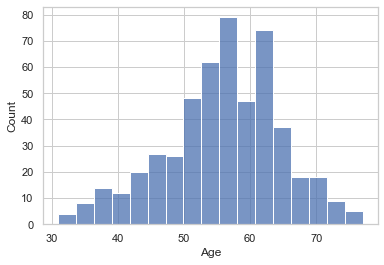

In [9]:
# Which age category has maximum heart disease?

# Grouping the data with heart disease yes or no

data1 = data.groupby('HeartDisease')
heart_disease_df = data1.get_group(1)   # yes
no_heart_disease_df = data1.get_group(0) # no

sns.histplot(data=heart_disease_df, x='Age')


In [ ]:

Inference - Age group of 55-60 has more heart disease patients


(80.0, 200.0)

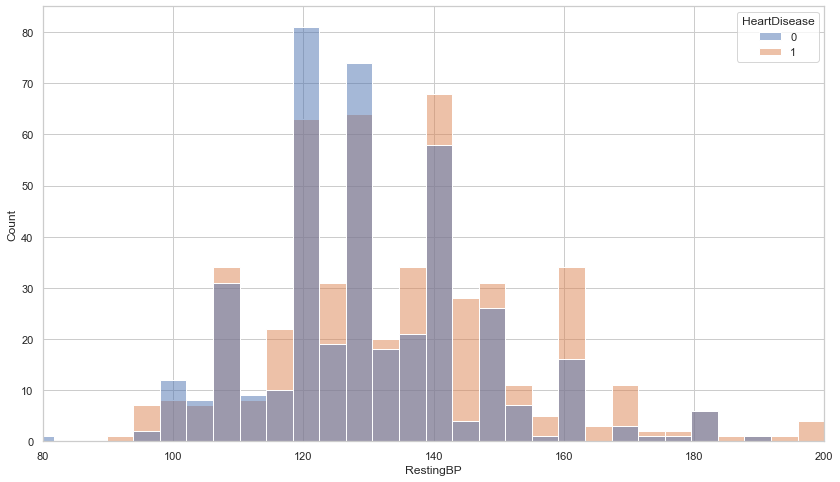

In [10]:
#  What is the range of resting blood pressure for patients with heart disease?

plt.figure(figsize=(14,8))
sns.histplot(data=data, x='RestingBP', hue ='HeartDisease')
plt.xlim(80, 200)

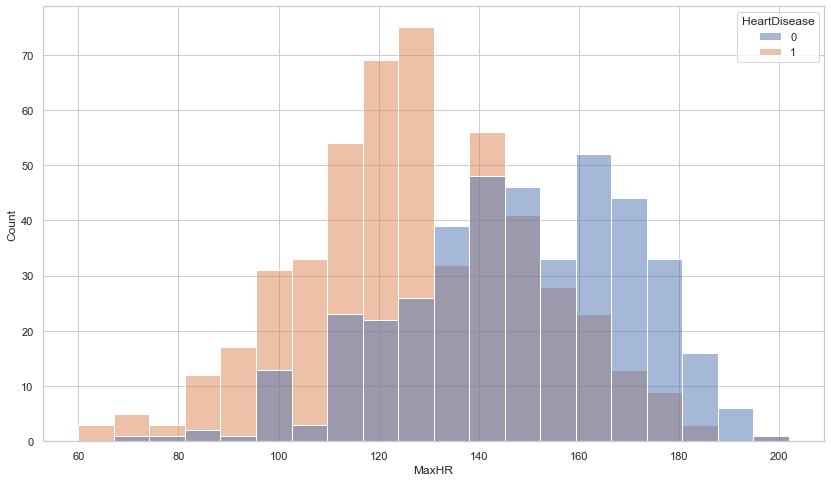

In [11]:

# Range of maximum HR ?

plt.figure(figsize=(14,8))
sns.histplot(data= data, x="MaxHR", hue= "HeartDisease");



Inference - Maximum heart rate of 120-130 BPM could be found with patients having heart disease
            Maximum heart rate of 160-165 BPM could be found in people having no heart disease
            

# Pie Chart

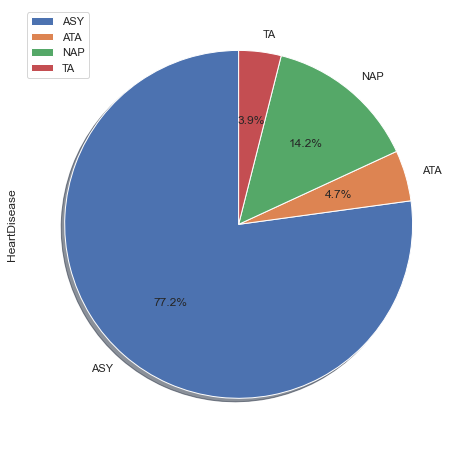

In [12]:
# Which type of chest pain is maximum found in patients 

data.groupby(['ChestPainType']).sum().plot(kind='pie', y='HeartDisease', 
                                           shadow = True,  startangle=90, figsize=(14,8), autopct='%1.1f%%')
plt.show()


Inference - ASY chest pain type is mostly found among the patients


# Heat MAP

<AxesSubplot:>

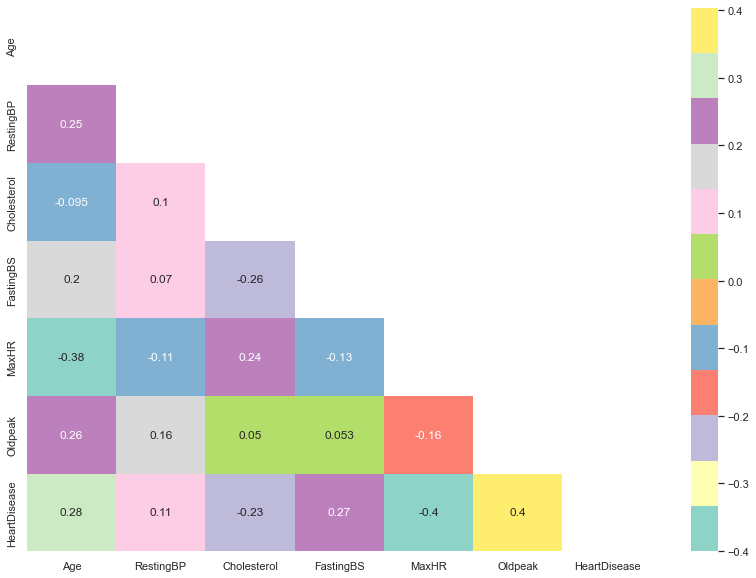

In [13]:
# Correlation using heat map
corr=data.corr()

plt.figure(figsize=(14,10))
matrix = np.triu(corr)
sns.heatmap(corr, annot = True, mask = matrix, cmap = 'Set3')


Inference - There seems to be no correlation between the features, as the range is between -0.4 to 0.4
